In [ ]:
#Chatlog：https://chatgpt.com/share/67355986-e8ec-8003-a05c-197fbca596d4

In [3]:
#Problem 4
import pandas as pd
import statsmodels.formula.api as smf


url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        16:47:52   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
#Problem 5
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

#This cell takes half of the rows in the original data and makes a new dataset called pokeaman train and the other half pokeaman test

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [3]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

#This cell makes a fitted line model with pokeaman train dataset and do .summary
#The outcome here is HP and the predictors are Attack and Defense

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        02:42:08   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2
      
#This cell gives R**2 of the original model, and used the model to predict the test dataset(the half of data not picked in training)
#The r between the prediction and real HP in the test dataset is calculated and squared to make R**2
#Then, the two calculated R**2 values are printed to compare.

SyntaxError: incomplete input (551314072.py, line 8)

In [26]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

#This cell basically adds a lot of variables into the model and run it and summarized it

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     7.863
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.75e-37
Time:                        17:13:23   Log-Likelihood:                -1698.7
No. Observations:                 400   AIC:                             3523.
Df Residuals:                     337   BIC:                             3775.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          406.6392     68.506      5.936      0.000     271.886     541.393
Legendary[T.True]                                                   -7.1400      4.817     -1.482      0.139     -16.615       2.336
Attack                                                              -5.7174      1.387     -4.121      0.000      -8.447      -2.988
Attack:Legendary[T.True]                                           -41.2780    138.054     -0.299      0.765    -312.834     230.278
Defense                                                             -4.7343      0.862     -5.493      0.000      -6.430      -3.039
Defense:Legendary[T.True]                                         -279.2693    140.044     -1.994      0.047    -554.740      -3.799
Attack:Defense                                                       0.0718      0.015      4.771      0.000       0.042       0.101
Attack:Defense:Legendary[T.True]                                     2.5418      2.179      1.167      0.244      -1.744       6.828
Speed                                                               -7.1913      1.129     -6.369      0.000      -9.412      -4.970
Speed:Legendary[T.True]                                           -247.7299    253.218     -0.978      0.329    -745.817     250.357
Attack:Speed                                                         0.1041      0.021      5.062      0.000       0.064       0.144
Attack:Speed:Legendary[T.True]                                       2.8297      3.199      0.884      0.377      -3.464       9.123
Defense:Speed                                                        0.0886      0.016      5.628      0.000       0.058       0.120
Defense:Speed:Legendary[T.True]                                      5.5668      3.670      1.517      0.130      -1.652      12.785
Attack:Defense:Speed                                                -0.0013      0.000     -5.177      0.000      -0.002      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0531      0.045     -1.192      0.234      -0.141       0.035
Q("Sp. Def")                                                        -2.4316      0.907     -2.680      0.008      -4.216      -0.647
Legendary[T.True]:Q("Sp. Def")                                     -29.1710     96.999     -0.301      0.764    -219.970     161.628
Attack:Q("Sp. Def")                                                  0.0585      0.020      2.905      0.004       0.019       0.098
Attack:Legendary[T.True]:Q("Sp. Def")                                0.5385      1.995      0.270      0.787      -3.385       4.462
Defense:Q("Sp. Def")    

In [27]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

#This cell is doing the same as cell 3, and the result shows there is overfitting in the model

'In sample' R-squared:     0.5912761333753753
'Out of sample' R-squared: 0.0034251525937714746


In [10]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        03:05:24   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        16:48:02   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Problem 7

import statsmodels.formula.api as smf

model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()


yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


In [18]:
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


In [19]:
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()


yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [14]:
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 

model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


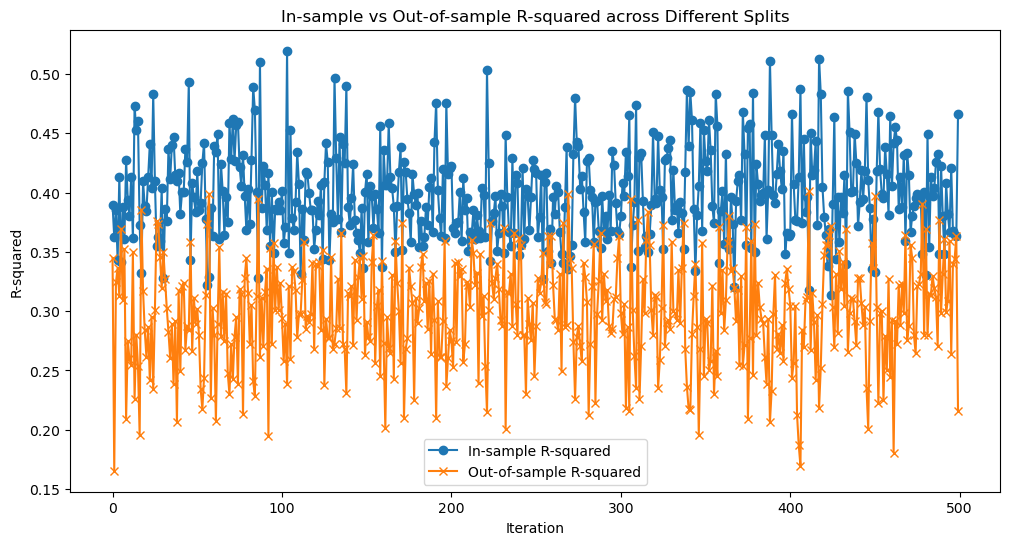

In [23]:
#Problem 8


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Number of iterations
num_iterations = 500

# Lists to collect in-sample and out-of-sample R-squared values
in_sample_r2 = []
out_of_sample_r2 = []

# Model formula
model_formula = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk") + I(Q("Type 1")=="Normal") + I(Q("Type 1")=="Water") + I(Generation==2) + I(Generation==5)'

for _ in range(num_iterations):
    # Split data into random train and test sets without setting a fixed seed
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit model to training data
    model_spec = smf.ols(formula=model_formula, data=pokeaman_train)
    model_fit = model_spec.fit()
    
    # Calculate in-sample R-squared
    in_sample_r2.append(model_fit.rsquared)
    
    # Calculate out-of-sample R-squared on test data
    y_test = pokeaman_test.HP
    yhat_test = model_fit.predict(pokeaman_test)
    out_sample_r2_value = np.corrcoef(y_test, yhat_test)[0, 1]**2 if len(y_test) > 1 else np.nan  # Ensure test data has sufficient data
    out_of_sample_r2.append(out_sample_r2_value)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(range(num_iterations), in_sample_r2, label="In-sample R-squared", marker='o')
plt.plot(range(num_iterations), out_of_sample_r2, label="Out-of-sample R-squared", marker='x')
plt.xlabel("Iteration")
plt.ylabel("R-squared")
plt.legend()
plt.title("In-sample vs Out-of-sample R-squared across Different Splits")
plt.show()


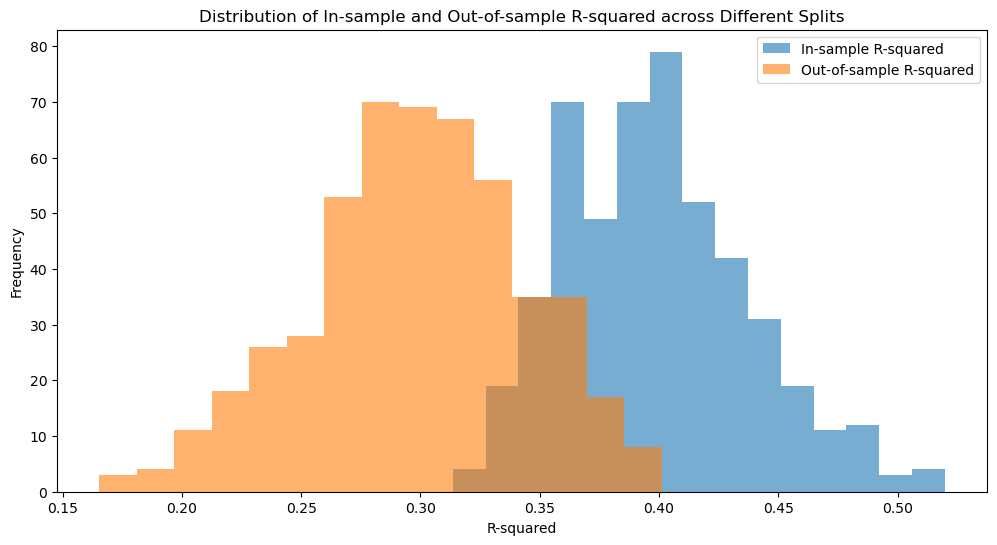

In [24]:

# Plot histograms for in-sample and out-of-sample R-squared values
plt.figure(figsize=(12, 6))

# In-sample R-squared histogram
plt.hist(in_sample_r2, bins=15, alpha=0.6, label="In-sample R-squared")
# Out-of-sample R-squared histogram
plt.hist(out_of_sample_r2, bins=15, alpha=0.6, label="Out-of-sample R-squared")

plt.xlabel("R-squared")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of In-sample and Out-of-sample R-squared across Different Splits")
plt.show()


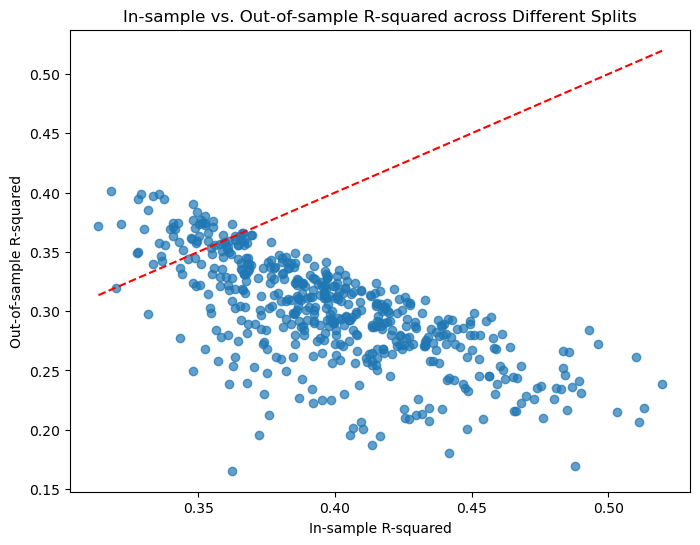

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(in_sample_r2, out_of_sample_r2, alpha=0.7, marker='o')
plt.xlabel("In-sample R-squared")
plt.ylabel("Out-of-sample R-squared")
plt.title("In-sample vs. Out-of-sample R-squared across Different Splits")
plt.plot([min(in_sample_r2), max(in_sample_r2)], [min(in_sample_r2), max(in_sample_r2)], color="red", linestyle="--")  # Diagonal line for reference
plt.show()

In [29]:
#Problem 9
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")


'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.0018707672260559664 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [30]:

model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.0018707672260559664 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [31]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.0036770431633682266 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [32]:

model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.0036770431633682266 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)
